In [73]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from data import hrrr_data, nam_data
import pandas as pd
import numpy as np
from datetime import timedelta
import os
import matplotlib.pyplot as plt

In [75]:
nysm_clim = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/nysm.csv")
clim_div = nysm_clim["climate_division_name"].unique()

In [82]:
nysm_clim[nysm_clim["climate_division_name"] == "Western Plateau"]

,stid,number,name,lat [degrees],lon [degrees],elevation [m],county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
0,ADDI,107,Addison,42.040360,-77.237260,507.614,Steuben,Addison,NY,6.9,S,1,Western Plateau,BGM,2016-08-10 18:15:00 UTC,NaN
6,BELM,70,Belmont,42.242490,-78.039580,417.576,Allegany,Belmont,NY,2.2,N,1,Western Plateau,BUF,2016-05-16 20:45:00 UTC,NaN
28,COHO,74,Cohocton,42.511780,-77.437620,599.328,Steuben,Cohocton,NY,5.8,E,1,Western Plateau,BGM,2016-05-17 16:30:00 UTC,NaN
34,DELE,67,Delevan,42.418464,-78.423200,622.310,Cattaraugus,Delevan,NY,9.2,SSE,1,Western Plateau,BUF,2016-03-08 21:15:00 UTC,NaN
43,ELMI,73,Elmira,42.113320,-76.836640,332.445,Chemung,Elmira,NY,3.5,NW,1,Western Plateau,BGM,2016-06-30 17:35:00 UTC,NaN
51,GROV,71,Grove,42.489510,-77.949460,609.722,Allegany,Grove,NY,8.9,NW,1,Western Plateau,BUF,2016-07-20 18:40:00 UTC,NaN
55,HART,40,Hartsville,42.211221,-77.689733,729.569,Steuben,Hartsville,NY,4.0,S,1,Western Plateau,BGM,2016-08-09 21:00:00 UTC,NaN
73,OLEA,65,Olean,42.091410,-78.407430,457.230,Cattaraugus,Olean,NY,2.1,ENE,1,Western Plateau,BUF,2016-06-02 23:15:00 UTC,NaN
85,RAND,125,Randolph,42.149280,-78.900960,448.970,Cattaraugus,Randolph,NY,6.3,ESE,1,Western Plateau,BUF,2016-06-02 15:50:00 UTC,NaN


In [76]:
parq = pd.read_parquet(
    "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20241113/ADDI/11_13_2024_18:43:33_full_ADDI.parquet"
)
parq

,t2m_ADDI,valid_time_cos,valid_time_sin,target_error,sh2_ADDI,d2m_ADDI,r2_ADDI,u10_ADDI,v10_ADDI,u_total_ADDI,...,relh_TYRO,srad_TYRO,pres_TYRO,mslp_TYRO,wspd_sonic_mean_TYRO,wspd_sonic_TYRO,wmax_sonic_TYRO,wdir_sonic_TYRO,snow_depth_TYRO,precip_total_TYRO
0,NaN,0.985301,0.170830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.038471,247.745102,982.604675,985.187744,4.119726,1.320363,3.688692,164.203903,0.063048,0.0
1,0.862978,0.985301,0.170830,-0.846182,0.003098,-3.315995,73.823425,0.402380,5.579844,5.597940,...,53.530331,424.953796,980.002319,981.649292,4.884252,4.505357,6.465100,198.588394,0.063490,0.0
2,-0.091899,0.985301,0.170830,-1.418360,0.003066,-3.461190,78.408316,0.378490,5.017619,5.037552,...,59.831310,39.165379,978.615173,980.221680,4.692114,4.235252,6.912003,189.830200,0.059946,0.0
3,-1.046776,0.982223,0.187719,-1.757370,0.003034,-3.606385,82.993206,0.354601,4.455393,4.477164,...,64.477623,0.006630,978.706299,980.492432,3.053744,4.194940,7.557590,195.943497,0.059425,0.0
4,-0.482857,0.982223,0.187719,-2.232366,0.003233,-2.763321,84.686085,0.453926,4.327775,4.359244,...,65.106262,0.000000,978.181213,979.877075,3.768588,1.501319,3.062800,189.789993,0.059773,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13458,3.685715,0.999853,-0.017166,-3.898070,0.004566,1.862747,88.304974,0.206476,2.357390,2.406829,...,69.275269,0.184212,972.343201,973.089966,1.929131,1.495082,2.775229,203.747101,0.022333,0.0
13459,3.050384,0.999853,-0.017166,-4.979472,0.004642,2.061798,93.556214,0.368997,2.021840,2.113641,...,72.991074,0.226718,970.932373,971.606750,2.425827,2.603343,4.762229,210.004898,0.020070,0.0
13460,5.562828,0.999853,-0.017166,-3.457287,0.005684,4.708916,94.376784,0.415359,2.381577,2.477685,...,76.338173,45.609474,969.911621,970.379150,3.709203,3.248561,5.198658,205.431503,0.022036,0.0
13461,8.075272,0.999853,-0.017166,-2.509858,0.006727,7.356034,95.197354,0.461721,2.741314,2.841729,...,74.299721,104.459465,966.502014,966.650208,3.564710,2.553376,4.610068,213.732697,0.018967,0.0


In [77]:
parq.iloc[:10, 10:21]

,u_dir_ADDI,tp_ADDI,prmsl_ADDI,orog_ADDI,tcc_ADDI,cape_ADDI,cin_ADDI,dswrf_ADDI,dlwrf_ADDI,gh_ADDI,valid_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-10 15:00:00
1,184.125064,0.000000,102619.745801,491.833566,14.615997,0.0,-0.026855,250.000000,227.949036,5677.678808,2018-01-10 18:00:00
2,184.241038,0.000000,102568.855734,491.833566,28.097626,0.0,0.001978,199.596405,240.543823,5690.035013,2018-01-10 21:00:00
3,184.357011,0.000000,102517.965668,491.833566,41.579254,0.0,0.030811,149.192810,253.138611,5702.391219,2018-01-11 00:00:00
4,185.856193,0.005045,102501.841042,491.833566,60.573395,0.0,0.020386,74.596405,272.028580,5713.529591,2018-01-11 03:00:00
5,187.355376,0.010090,102485.716416,491.833566,79.567535,0.0,0.009961,0.000000,290.918549,5724.667963,2018-01-11 06:00:00
6,189.457548,0.005045,102484.701165,491.833566,81.159012,0.0,0.005499,0.000000,289.870422,5734.930656,2018-01-11 09:00:00
7,191.559720,0.000000,102483.685913,491.833566,82.750488,0.0,0.001038,0.000000,288.822296,5745.193349,2018-01-11 12:00:00
8,189.310498,0.000000,102365.862833,491.833566,91.375244,0.0,0.207184,104.192810,290.431549,5745.867294,2018-01-11 15:00:00
9,187.061276,0.000000,102248.039754,491.833566,100.000000,0.0,0.413330,208.385620,292.040802,5746.541239,2018-01-11 18:00:00


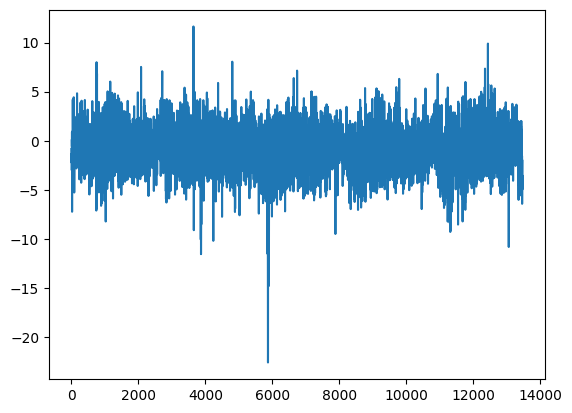

In [68]:
plt.plot(parq["target_error"])

In [4]:
df = pd.read_csv(
    "/home/aevans/nwp_bias/src/machine_learning/data/parent_models/GFS/s2s/Western Plateau_t2m_GFS_lookup_linear.csv"
)
df

,station,forecast_hour,alpha,diff,mae,mse
0,ADDI,3,5.078857,-0.044150,0.757367,0.968805
1,BELM,3,5.099687,0.062748,0.775811,1.181353
2,COHO,3,4.930831,0.190849,0.665806,0.732179
3,DELE,3,3.980858,0.294497,0.742855,0.981687
4,ELMI,3,4.365949,-0.011863,0.750991,1.041622
...,...,...,...,...,...,...
103,ELMI,36,4.213265,0.124424,0.738574,0.936945
104,GROV,36,3.538529,0.255976,0.758141,0.959175
105,HART,36,4.641013,0.037130,0.757067,0.930642
106,OLEA,36,5.015950,0.042522,0.725305,0.889640


In [5]:
df1 = pd.read_csv(
    "/home/aevans/nwp_bias/src/machine_learning/data/parent_models/HRRR/s2s/Central Lakes_u_total_HRRR_lookup_quad.csv"
)
# df = df[df["station"] == "ADDI"]
df1

,station,forecast_hour,alpha,beta,charli,mae,mse
0,BURD,1,0.093305,-0.870653,0.088407,0.795766,1.048128
1,CLIF,1,0.650041,-1.065138,-0.071504,0.697016,0.841365
2,FAYE,1,0.294634,-0.973285,0.050659,0.710490,0.856686
3,GROT,1,0.422231,-1.037225,0.014698,0.695523,0.827333
4,BURD,1,-0.177563,-0.822421,0.219623,0.807318,1.078713
...,...,...,...,...,...,...,...
238,TULL,18,0.092513,-0.846209,-0.010578,0.664569,0.761666
239,TYRO,18,0.158530,-1.016750,-0.009181,0.694500,0.822604
240,WARS,18,0.443278,-1.032905,-0.028514,0.598542,0.594254
241,WATE,18,0.255109,-0.904530,0.009548,0.649064,0.719264


In [6]:
# Group by 'station' and set 'fh' as the index
df_grouped = df.groupby("station").apply(lambda x: x.set_index("forecast_hour"))

# # Optionally, reset the index to avoid multi-level indexing from `groupby().apply()`
# df_grouped = df_grouped.reset_index(level=0, drop=True)

# Display the DataFrame
df_grouped

station     alpha      diff       mae       mse
station forecast_hour                                                
ADDI    3                ADDI  5.078857 -0.044150  0.757367  0.968805
        6                ADDI  4.096636  0.120868  0.752292  0.987729
        9                ADDI  3.623907  0.004507  0.729812  0.903981
        12               ADDI  4.929714 -0.025838  0.726266  0.897779
        15               ADDI  4.121275  0.076520  0.752878  0.963426
...                       ...       ...       ...       ...       ...
RAND    24               RAND  5.262534  0.084622  0.734444  0.941268
        27               RAND  5.791254  0.039000  0.770334  1.046833
        30               RAND  4.222213  0.138049  0.731041  0.932359
        33               RAND  4.512845  0.022458  0.745540  0.961560
        36               RAND  4.236576 -0.072439  0.730303  0.921440

[108 rows x 5 columns]

In [7]:
nysm_clim = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/nysm.csv")
nysm_clim[nysm_clim["climate_division_name"] == "Eastern Plateau"]

,stid,number,name,lat [degrees],lon [degrees],elevation [m],county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
1,ANDE,111,Andes,42.182270,-74.801390,518.282,Delaware,Andes,NY,1.5,WSW,2,Eastern Plateau,BGM,2016-08-04 15:55:00 UTC,NaN
4,BELD,90,Belden,42.223220,-75.668520,470.370,Broome,Belden,NY,2.2,NNE,2,Eastern Plateau,BGM,2015-11-30 20:20:00 UTC,NaN
7,BERK,80,Berkshire,42.320300,-76.203190,393.590,Tioga,Berkshire,NY,2.2,NW,2,Eastern Plateau,BGM,2015-11-19 16:25:00 UTC,NaN
8,BING,5,Binghamton,42.058430,-75.951040,534.436,Broome,Binghamton,NY,5.2,SSW,2,Eastern Plateau,BGM,2016-10-04 18:25:00 UTC,NaN
14,BROO,96,Brookfield,42.795910,-75.299290,505.176,Madison,Brookfield,NY,2.4,SE,2,Eastern Plateau,BGM,2016-08-05 17:35:00 UTC,NaN
23,CINC,44,Cincinnatus,42.522424,-75.975622,423.916,Cortland,Cincinnatus,NY,6.9,WSW,2,Eastern Plateau,BGM,2016-04-21 18:30:00 UTC,NaN
24,CLAR,110,Claryville,41.979200,-74.517100,583.692,Ulster,Claryville,NY,8.2,NE,2,Eastern Plateau,BGM,2016-10-20 19:00:00 UTC,NaN
27,COBL,23,Cobleskill,42.676267,-74.507967,327.960,Schoharie,Cobleskill,NY,1.9,W,2,Eastern Plateau,ALY,2016-01-25 23:05:00 UTC,NaN
35,DEPO,106,Deposit,42.068551,-75.392193,311.658,Delaware,Deposit,NY,2.5,ENE,2,Eastern Plateau,BGM,2016-08-23 16:00:00 UTC,NaN
37,DUAN,113,Duanesburg,42.803190,-74.173610,417.149,Schenectady,Duanesburg,NY,5.6,NW,2,Eastern Plateau,ALY,2016-07-22 17:25:00 UTC,NaN


In [8]:
def get_more_fh(fh, station, var, times):
    hrrr_df_0 = hrrr_data.read_hrrr_data(str(fh + 2).zfill(2))
    hrrr_df_1 = hrrr_data.read_hrrr_data(str(fh + 4).zfill(2))

    hrrr_df_0 = hrrr_df_0[hrrr_df_0["station"] == station]
    hrrr_df_1 = hrrr_df_1[hrrr_df_1["station"] == station]

    hrrr_df_0 = hrrr_df_0[["valid_time", var]]
    hrrr_df_1 = hrrr_df_1[["valid_time", var]]

    # Create a DataFrame for valid times
    df = pd.DataFrame({"valid_time": times})
    df = df.merge(hrrr_df_0, on="valid_time", suffixes=(None, f"_{station}_+2"))
    df = df.merge(hrrr_df_1, on="valid_time", suffixes=(None, f"_{station}_+4"))
    df = df.rename(columns={"t2m": f"{var}_{station}_+2"})
    # df.fillna(-999, inplace=True)

    fh2 = df[f"{var}_{station}_+2"].values
    fh4 = df[f"{var}_{station}_+4"].values

    print(len(fh2))
    print(len(fh4))

    return fh2, fh4

In [9]:
def read_nam_data(fh):
    """
    Reads and concatenates parquet files containing forecast and error data for HRRR weather models
    for the years 2018 to 2022.

    Returns:
        pandas.DataFrame: of hrrr weather forecast information for each NYSM site.
    """

    years = ["2022", "2023"]
    savedir = f"/home/aevans/nwp_bias/src/machine_learning/data/nam_data/fh{fh}/"

    # create empty lists to hold dataframes for each model
    nam_fcast_and_error = []

    # loop over years and read in parquet files for each model
    for year in years:
        for month in np.arange(1, 13):
            str_month = str(month).zfill(2)
            if (
                os.path.exists(
                    f"{savedir}NAM_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                )
                == True
            ):
                print(
                    f"{savedir}NAM_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                )
                nam_fcast_and_error.append(
                    pd.read_parquet(
                        f"{savedir}NAM_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                    )
                )
            else:
                continue
            gc.collect()

    # concatenate dataframes for each model
    nam_fcast_and_error_df = pd.concat(nam_fcast_and_error)
    nam_fcast_and_error_df = nam_fcast_and_error_df.dropna()

    # return dataframes for each model
    return nam_fcast_and_error_df

In [15]:
def read_gfs_data(fh):
    """
    Reads and concatenates parquet files containing forecast and error data for HRRR weather models
    for the years 2018 to 2022.

    Returns:
        pandas.DataFrame: of hrrr weather forecast information for each NYSM site.
    """

    years = ["2018", "2019", "2020", "2021", "2022", "2023"]
    savedir = f"/home/aevans/nwp_bias/src/machine_learning/data/gfs_data/fh{fh}/"

    # create empty lists to hold dataframes for each model
    gfs_fcast_and_error = []

    # loop over years and read in parquet files for each model
    for year in years:
        print("compiling", year)
        for month in np.arange(1, 13):
            print(month)
            str_month = str(month).zfill(2)
            if (
                os.path.exists(
                    f"{savedir}GFS_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                )
                == True
            ):
                gfs_fcast_and_error.append(
                    pd.read_parquet(
                        f"{savedir}GFS_{year}_{str_month}_direct_compare_to_nysm_sites_mask_water.parquet"
                    )
                )
            else:
                continue

    # concatenate dataframes for each model
    gfs_fcast_and_error_df = pd.concat(gfs_fcast_and_error)

    # return dataframes for each model
    return gfs_fcast_and_error_df

In [16]:
def load_nysm_data():
    """
    Load and concatenate NYSM (New York State Mesonet) data from parquet files.

    NYSM data is resampled at 1-hour intervals and stored in separate parquet files
    for each year from 2018 to 2022.

    Returns:
        nysm_1H_obs (pd.DataFrame): A DataFrame containing concatenated NYSM data with
        missing values filled for the 'snow_depth' column.

    This function reads NYSM data from parquet files, resamples it to a 1-hour interval,
    and concatenates the data from multiple years. Missing values in the 'snow_depth'
    column are filled with -999, and any rows with missing values are dropped before
    returning the resulting DataFrame.

    Example:
    ```
    nysm_data = load_nysm_data()
    print(nysm_data.head())
    ```

    Note: Ensure that the parquet files are located in the specified path before using this function.
    """
    # Define the path where NYSM parquet files are stored.
    nysm_path = "/home/aevans/nwp_bias/data/nysm/"

    # Initialize an empty list to store data for each year.
    nysm_1H = []

    # Loop through the years from 2018 to 2022 and read the corresponding parquet files.
    for year in np.arange(2018, 2023):
        df = pd.read_parquet(f"{nysm_path}nysm_3H_obs_{year}.parquet")
        df.reset_index(inplace=True)
        nysm_1H.append(df)

    # Concatenate data from different years into a single DataFrame.
    nysm_1H_obs = pd.concat(nysm_1H)

    # Fill missing values in the 'snow_depth' column with -999.
    nysm_1H_obs["snow_depth"].fillna(-999, inplace=True)
    # Fill missing values in the 'snow_depth' column with -999.
    nysm_1H_obs["ta9m"].fillna(-999, inplace=True)

    # if nysm_1H_obs['ta9m'].isna().mean() > 0.8:
    #     nysm_1H_obs.drop('ta9m', axis=1, inplace=True)

    nysm_1H_obs.dropna(inplace=True)

    return nysm_1H_obs

In [17]:
df = load_nysm_data()

# df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/nysm.csv")

# stations_ls = ['MANH', 'VOOR', 'HERK', 'ANDE', 'BUFF', 'SCIP', 'GROV', 'LOUI', 'ESSX', 'GABR']

In [18]:
df.head()

,station,time_3H,lat,lon,elev,tair,ta9m,td,relh,srad,pres,mslp,wspd_sonic_mean,wspd_sonic,wmax_sonic,wdir_sonic,snow_depth,precip_total
1,ADDI,2018-01-01 03:00:00,42.040359,-77.237259,507.614014,-18.830400,-18.333630,-21.994141,76.068916,0.000000,964.409973,971.574524,1.695046,1.247007,1.992487,309.544586,0.045029,0.0
2,ADDI,2018-01-01 06:00:00,42.040359,-77.237259,507.614014,-18.700809,-18.628189,-22.008728,75.137451,0.000000,964.307983,971.436768,1.215756,1.593597,2.972308,300.071198,0.045546,0.0
3,ADDI,2018-01-01 09:00:00,42.040359,-77.237259,507.614014,-18.812420,-18.615080,-21.197678,81.426468,0.000000,964.421570,971.581787,1.485301,1.245601,3.024723,302.818390,0.044967,0.0
4,ADDI,2018-01-01 12:00:00,42.040359,-77.237259,507.614014,-19.151920,-19.002239,-21.896500,78.857536,0.000000,964.938416,972.197205,1.515975,2.100661,4.029578,272.933014,0.049035,0.0
5,ADDI,2018-01-01 15:00:00,42.040359,-77.237259,507.614014,-16.211229,-16.393150,-20.564865,69.095306,34.835739,965.472778,971.979797,2.354763,1.854602,3.347583,260.777710,0.049563,0.0


In [19]:
gfs = read_gfs_data("009")

compiling 2018
1
2
3
4
5
6
7
8
9
10
11
12
compiling 2019
1
2
3
4
5
6
7
8
9
10
11
12
compiling 2020
1
2
3
4
5
6
7
8
9
10
11
12
compiling 2021
1
2
3
4
5
6
7
8
9
10
11
12
compiling 2022
1
2
3
4
5
6
7
8
9
10
11
12
compiling 2023
1
2
3
4
5
6
7
8
9
10
11
12


In [21]:
gfs

,time,latitude,longitude,t2m,sh2,d2m,r2,u10,v10,u_total,...,cin,dswrf,dlwrf,gh,station,valid_time,level_0,index,lead time,landn
2018-01-01 09:00:00.000000,2018-01-01 00:00:00,42.040359,-77.237259,-17.678911,0.000735,-21.048163,87.159466,2.764170,-2.169724,3.521404,...,0.016211,0.000000,155.413971,5201.930783,ADDI,2018-01-01 09:00:00,0.0,0.0,0.0,0.0
2018-01-01 09:00:00.000000,2018-01-01 00:00:00,42.182270,-74.801392,-21.250021,0.000548,-24.628008,91.274413,1.792173,-2.315375,2.950687,...,0.016211,0.000000,146.699730,5185.811138,ANDE,2018-01-01 09:00:00,0.0,0.0,0.0,0.0
2018-01-01 09:00:00.000000,2018-01-01 00:00:00,43.019939,-78.135658,-19.138270,0.000684,-21.547435,97.314600,2.648206,1.410129,3.099311,...,0.016211,0.000000,183.047104,5184.171794,BATA,2018-01-01 09:00:00,0.0,0.0,0.0,0.0
2018-01-01 09:00:00.000000,2018-01-01 00:00:00,41.528751,-73.945267,-16.231911,0.000692,-21.218044,73.998199,1.481601,-1.303993,2.005583,...,0.016211,0.000000,156.364731,5205.991915,BEAC,2018-01-01 09:00:00,0.0,0.0,0.0,0.0
2018-01-01 09:00:00.000000,2018-01-01 00:00:00,42.223221,-75.668518,-17.650030,0.000731,-21.165374,86.683777,2.170874,-2.852610,3.592979,...,0.016211,0.000000,179.079865,5187.997145,BELD,2018-01-01 09:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.010163,2023-12-30 18:00:00,43.500000,-74.500000,-4.755463,0.002220,-8.122589,77.800003,3.543525,-2.509341,4.342046,...,-0.419434,0.000000,224.008377,5398.625488,PISE,2023-12-31 03:00:00,58399.0,93171.0,9.0,1.0
1970-01-01 00:00:00.010164,2023-12-31 00:00:00,43.500000,-74.500000,-6.006195,0.002038,-9.194641,79.400002,2.445464,-1.812251,3.043772,...,-0.461792,0.000000,205.023239,5440.320312,PISE,2023-12-31 09:00:00,58400.0,93950.0,9.0,1.0
1970-01-01 00:00:00.010165,2023-12-31 06:00:00,43.500000,-74.500000,-4.149323,0.001896,-10.069733,63.900002,2.345952,-1.792864,2.952601,...,0.035156,116.300003,196.398529,5463.869629,PISE,2023-12-31 15:00:00,58401.0,94729.0,9.0,1.0
1970-01-01 00:00:00.010166,2023-12-31 12:00:00,43.500000,-74.500000,-2.640808,0.002305,-7.577972,69.099998,2.354861,-1.023290,2.567585,...,0.334656,211.380005,212.214935,5437.790527,PISE,2023-12-31 21:00:00,58402.0,95508.0,9.0,1.0


In [20]:
lons = df["lon [degrees]"].values
lats = df["lat [degrees]"].values

KeyError: 'lon [degrees]'

In [ ]:
df

In [ ]:
df = df[df["stid"].isin(stations_ls)]
df = df[["lat [degrees]", "lon [degrees]"]]

In [ ]:
df.to_csv("/home/aevans/nwp_bias/src/landtype/data/first_paper_stations_coords.csv")

In [ ]:
# import gc

# gfs_df = read_gfs_data("006")

In [ ]:
# gfs_df["station"].unique()

In [ ]:
fh = 6
station = "SOUT"
var = "t2m"

In [ ]:
df = pd.read_parquet(
    "/home/aevans/nwp_bias/src/machine_learning/data/nam_data/fh001/NAM_2022_04_direct_compare_to_nysm_sites_mask_water.parquet"
)
df

In [ ]:
nam_df = read_nam_data(str(fh).zfill(3))

In [ ]:
# hrrr_df = hrrr_data.read_hrrr_data(str(fh).zfill(2))

# # Filter NYSM data to match valid times from HRRR data
# mytimes = hrrr_df["valid_time"].tolist()
# fh2_, fh4_ = get_more_fh(fh, station, var, mytimes)

In [ ]:
# len(mytimes)

In [ ]:
a100_mae = [
    0.07,
    0.17,
]
a100_mse = [
    0.07,
    0.22,
]
a100_batch = [
    1000,
    5000,
]
a100_gpu = [8, 30]
a100_runtime = [
    timedelta(seconds=24, minutes=16, hours=0),
    timedelta(seconds=5, minutes=16, hours=0),
]

In [ ]:
gh200_mae = [0.06, 0.06]
gh200_mse = [0.06, 0.07]
gh200_batch = [1000, 10000]
gh200_gpu = [8, 64]
gh200_runtime = [
    timedelta(seconds=22, minutes=6, hours=0),
    timedelta(seconds=51, minutes=6, hours=0),
]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta


def plot_runtime_bar_chart(a100_batch, a100_run_time):
    # Convert timedelta objects to total minutes
    run_time_minutes = [rt.total_seconds() / 60 for rt in a100_run_time]

    # Create the plot
    fig, ax = plt.subplots()

    # Plot the bar chart
    ax.bar(a100_batch, run_time_minutes, 1000, color="orange", label="Run Time")

    # Adding scatter points with large X markers on top of bars
    # ax.scatter(a100_batch, run_time_minutes, color='red', marker='x', s=100, label='Run Time Points')

    # Adding labels and title
    ax.set_xlabel("Batch Size")
    ax.set_ylabel("Run Time (minutes)")
    ax.set_title("Run Time by Batch Size gh200")

    # Display the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_metrics_bar(a100_mae, a100_mse, a100_batch):
    # Number of bars
    n = len(a100_mae)

    # Create an array for the positions of the bars
    bar_width = 0.35
    index = np.arange(n)

    # Plotting the bars
    fig, ax = plt.subplots()
    bar1 = ax.bar(
        index,
        a100_mae,
        bar_width,
    )
    # bar2 = ax.bar(index + bar_width, a100_mse, bar_width, label='MSE')

    # Adding labels and title
    ax.set_xlabel("Batch Size")
    ax.set_ylabel("GPU Memory")
    ax.set_ylim(0, 90)
    ax.set_title("GPU Memory by Batch Size for a100")
    ax.set_xticks(index)
    ax.set_xticklabels(a100_batch)
    ax.legend()

    # Display the plot
    plt.show()

In [ ]:
plot_runtime_bar_chart(a100_batch, a100_runtime)

In [ ]:
plot_runtime_bar_chart(gh200_batch, gh200_runtime)

In [ ]:
plot_metrics_bar(a100_gpu, a100_mse, a100_batch)

In [ ]:
plot_metrics_bar(gh200_gpu, gh200_mse, gh200_batch)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as crs
import cartopy.feature as cfeature

color_dict = {
    0: "cyan",
    1: "blue",
    2: "yellow",
    3: "green",
    # 4: 'red',
    # 5: 'orange',
    # 6: 'purple',
    # 7: 'black',
    # 8: 'white'
}


def plurality_plot(df, geovar):
    projPC = crs.PlateCarree()
    latN = df["lat"].max() + 1
    latS = df["lat"].min() - 1
    lonW = df["lon"].max() + 1
    lonE = df["lon"].min() - 1
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(6, 6), subplot_kw={"projection": crs.PlateCarree()}, dpi=400
    )
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )
    ax.scatter(
        x=df["lon"],
        y=df["lat"],
        c=df["color"],
        s=40,
        marker="o",
        edgecolor="black",
        transform=crs.PlateCarree(),
    )
    ax.set_title(f"Mesonet Site {geovar} Clusters", size=16)
    ax.set_xlabel("Longitude", size=14)
    ax.set_ylabel("Latitude", size=14)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid()

    # Create legend patches
    legend_patches = [
        mpatches.Patch(color=color, label=f"Category {key}")
        for key, color in color_dict.items()
    ]

    # Add the legend to the plot
    ax.legend(
        handles=legend_patches,
        loc="upper left",  # Use 'upper left' to anchor the legend in the figure
        bbox_to_anchor=(1.1, 1),  # Move the legend outside the plot to the right
        borderaxespad=0,  # Adjust the padding between the legend and the axes
        title="Categories",
    )

    plt.show()

In [ ]:
cluster_df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/lstm_clusters.csv")
cluster_df["lon"] = lons
cluster_df["lat"] = lats
cluster_df["color"] = cluster_df["elev_cat"].map(color_dict)
cluster_df

In [ ]:
plurality_plot(cluster_df, "Elevation")

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [ ]:
def plot(df, shapefile_path):
    # Define a list of colors for each shape file
    colors = list(mcolors.TABLEAU_COLORS.values())
    projPC = crs.PlateCarree()
    latN = df["nysm_lat"].max() + 0.5
    latS = df["nysm_lat"].min() - 0.5
    lonW = df["nysm_lon"].max() + 0.5
    lonE = df["nysm_lon"].min() - 0.5
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(
        figsize=(9, 15), subplot_kw={"projection": crs.PlateCarree()}
    )
    ax.legend()
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle="--")
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(
        crs=crs.PlateCarree(),
        draw_labels=True,
        linewidth=2,
        color="black",
        alpha=0.5,
        linestyle="--",
    )

    plt.scatter(
        df["nysm_lon"],
        df["nysm_lat"],
        c="blue",
        s=70,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=5,
        label="NYSM Sites",
    )

    plt.scatter(
        df["nysm_lon"].iloc[0],
        df["nysm_lat"].iloc[0],
        c="green",
        marker="*",
        s=400,
        edgecolors="black",
        transform=crs.PlateCarree(),
        zorder=5,
        label="Southold",
    )

    # plt.scatter(
    #     df["hrrr_lon"],
    #     df["hrrr_lat"],
    #     c='orange',
    #     s = 70,
    #     edgecolors='black',
    #     transform=crs.PlateCarree(),
    #     zorder=5,
    #     label='HRRR'
    # )

    # Annotate each point in NYSM
    for i, txt in enumerate(df["station"]):
        plt.annotate(
            txt,
            (df["nysm_lon"].iloc[i], df["nysm_lat"].iloc[i]),
            textcoords="offset points",
            xytext=(5, 10),
            ha="center",
            fontsize=18,
        )

    # Load the shape file using geopandas
    climate_divisions = gpd.read_file(shapefile_path)
    # Plot climate divisions from the shape file
    climate_divisions.plot(
        ax=ax,
        edgecolor="black",
        facecolor="none",
        transform=crs.PlateCarree(),
        zorder=4,
    )

    plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0, fontsize=12)

In [ ]:
path = "/home/aevans/nwp_bias/src/machine_learning/notebooks/data/GIS.OFFICIAL_CLIM_DIVISIONS.shp"